# Temperature Forecast Project using ML
# Problem Statement:
# Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


# Attribute Information:

# For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

# Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



In [79]:

# Impoting necessory Libraries:

import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Model Creation :
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from sklearn import metrics

#Metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [80]:
#READ THE DATASET


df=pd.read_csv('C:/Users/HP/Desktop/data sets/temperaturee.csv')
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

- Temperature forecasting is the application of current technology and science to predict the state of the atmosphere for a future time and a given location.Temperature forecasts are made by collecting as much data as possible about the current state of the atmosphere (particularly the temperature, humidity and wind) and using understanding of atmospheric processes (through meteorology) to determine how the atmosphere evolves in the upcoming days.However, the chaotic nature of the atmosphere and incomplete understanding of the processes mean that forecasts become less accurate as the range of the forecast increases.
- This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.The two Target variable is continuous in nature and thus this is a Regression problem.we will use different regression problem to predict the maximum and minimum temperature of the given place.As most of the independent variables of the given data set are readings of the factors affecting the temperature,so every features is continuous in nature.

In [81]:
df.shape

(7752, 25)

- The dataset contains 7752 rows and 25 columns in the dataset.That means there are total 24 factors given in the rows,which affects the temperature and there are 7752 different entries date wise of this four years data collection. 

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


- Every column is float in nature except the Date column.

In [83]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

- Every column is float in nature except the Date column.

In [84]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

- Found out all the column names of this dataset.The description of the column names are given in the problem statement.

In [85]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

- We can see that the data consists from 25 different weather stations.
- most of the variables are unique in nature.

In [86]:
# Checking the statistical summary:
df.describe().T

count         mean         std          min          25%  \
station           7750.0    13.000000    7.211568     1.000000     7.000000   
Present_Tmax      7682.0    29.768211    2.969999    20.000000    27.800000   
Present_Tmin      7682.0    23.225059    2.413961    11.300000    21.700000   
LDAPS_RHmin       7677.0    56.759372   14.668111    19.794666    45.963543   
LDAPS_RHmax       7677.0    88.374804    7.192004    58.936283    84.222862   
LDAPS_Tmax_lapse  7677.0    29.613447    2.947191    17.624954    27.673499   
LDAPS_Tmin_lapse  7677.0    23.512589    2.345347    14.272646    22.089739   
LDAPS_WS          7677.0     7.097875    2.183836     2.882580     5.678705   
LDAPS_LH          7677.0    62.505019   33.730589   -13.603212    37.266753   
LDAPS_CC1         7677.0     0.368774    0.262458     0.000000     0.146654   
LDAPS_CC2         7677.0     0.356080    0.258061     0.000000     0.140615   
LDAPS_CC3         7677.0     0.318404    0.250362     0.000000     0.101388   
LDAPS_CC4         7677.0     0.299191    0.254348     0.000000     0.081532   
LDAPS_PPT1        7677.0     0.591995    1.945768     0.000000     0.000000   
LDAPS_PPT2        7677.0     0.485003    1.762807     0.000000     0.000000   
LDAPS_PPT3        7677.0     0.278200    1.161809     0.000000     0.000000   
LDAPS_PPT4        7677.0     0.269407    1.206214     0.000000     0.000000   
lat               7752.0    37.544722    0.050352    37.456200    37.510200   
lon               7752.0   126.991397    0.079435   126.826000   126.937000   
DEM               7752.0    61.867972   54.279780    12.370000    28.700000   
Slope             7752.0     1.257048    1.370444     0.098475     0.271300   
Solar radiation   7752.0  5341.502803  429.158867  4329.520508  4999.018555   
Next_Tmax         7725.0    30.274887    3.128010    17.400000    28.200000   
Next_Tmin         7725.0    22.932220    2.487613    11.300000    21.300000   

                          50%          75%          max  
station             13.000000    19.000000    25.000000  
Present_Tmax        29.900000    32.000000    37.600000  
Present_Tmin        23.400000    24.900000    29.900000  
LDAPS_RHmin         55.039024    67.190056    98.524734  
LDAPS_RHmax         89.793480    93.743629   100.000153  
LDAPS_Tmax_lapse    29.703426    31.710450    38.542255  
LDAPS_Tmin_lapse    23.760199    25.152909    29.619342  
LDAPS_WS             6.547470     8.032276    21.857621  
LDAPS_LH            56.865482    84.223616   213.414006  
LDAPS_CC1            0.315697     0.575489     0.967277  
LDAPS_CC2            0.312421     0.558694     0.968353  
LDAPS_CC3            0.262555     0.496703     0.983789  
LDAPS_CC4            0.227664     0.499489     0.974710  
LDAPS_PPT1           0.000000     0.052525    23.701544  
LDAPS_PPT2           0.000000     0.018364    21.621661  
LDAPS_PPT3           0.000000     0.007896    15.841235  
LDAPS_PPT4           0.000000     0.000041    16.655469  
lat                 37.550700    37.577600    37.645000  
lon                126.995000   127.042000   127.135000  
DEM                 45.716000    59.832400   212.335000  
Slope                0.618000     1.767800     5.178230  
Solar radiation   5436.345215  5728.316406  5992.895996  
Next_Tmax           30.500000    32.600000    38.900000  
Next_Tmin           23.100000    24.600000    29.800000

- The weather stationn is serially coded from 1 to 25.
- Most of the data is close to normally distributed except PPT 1 to PPT4.
- Present_Tmax and Present_Tmin may be having left skewed.
- LDAPS_RHmax may have left skewness.
- cc1 to CC4 may have Right skewness.

# FEATURE ENGINEERING:

In [87]:
# Checking null values:
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

- Most of the column is having null values.

In [88]:

df.station.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

- The weather stationn is serially coded from 1 to 25.we can delete this column latter.

In [89]:
# Checking null values in stattion column:
df[df['station'].isnull()]

station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaN          20.0          11.3    19.794666    58.936283   
7751      NaN  NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM     Slope  \
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.370  0.098475   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.335  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8  

[2 rows x 25 columns]

- Found out the null value in station column ,we will fill it by 1.

In [90]:
df.fillna({'Date': '31-08-2017'}, inplace=True)

- Filling the null values of date column.

In [91]:
df[df['station'].isnull()]

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7750      NaN  31-08-2017          20.0          11.3    19.794666   
7751      NaN  31-08-2017          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  \
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.370   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.335   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[2 rows x 25 columns]

In [92]:
df.fillna({'station': 1.0}, inplace=True)

In [93]:
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      1.0  31-08-2017          20.0          11.3    19.794666   
7751      1.0  31-08-2017          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

- We can see that the null values of Station column is filled with 1

In [94]:
# Separating the Date column into Month and Day by using .dt.day and .month method.(Converting the Categorical into numerical)

In [95]:
df['Date']=pd.to_datetime(df['Date'])

In [96]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [97]:
df['Day'] = df['Date'].dt.day

In [98]:
df.drop(['Date'],axis=1,inplace=True)

- Dropping the date column as it is separated into Month and day.

In [99]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   
7750      1.0          20.0          11.3    19.794666    58.936283   
7751      1.0          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936   6.818887   69.451805   0.233947   
1            29.850689         24.035009   5.691890   51.937448   0.225508   
2            30.091292         24.565633   6.138224   20.573050   0.209344   
3            29.704629         23.326177   5.650050   65.727144   0.216372   
4            29.113934         23.486480   5.735004  107.965535   0.151407   
...                ...               ...        ...         ...        ...   
7747         26.352081         18.775678   6.148918   72.058294   0.030034   
7748         27.010193         18.733519   6.542819   47.241457   0.035874   
7749         27.939516         18.522965   7.289264    9.090034   0.048954   
7750         17.624954         14.272646   2.882580  -13.603212   0.000000   
7751         38.542255         29.619342  21.857621  213.414006   0.967277   

      ...  LDAPS_PPT4      lat      lon       DEM     Slope  Solar radiation  \
0     ...    0.000000  37.6046  126.991  212.3350  2.785000      5992.895996   
1     ...    0.000000  37.6046  127.032   44.7624  0.514100      5869.312500   
2     ...    0.000000  37.5776  127.058   33.3068  0.266100      5863.555664   
3     ...    0.000000  37.6450  127.022   45.7160  2.534800      5856.964844   
4     ...    0.000000  37.5507  127.135   35.0380  0.505500      5859.552246   
...   ...         ...      ...      ...       ...       ...              ...   
7747  ...    0.000000  37.5372  126.891   15.5876  0.155400      4443.313965   
7748  ...    0.000000  37.5237  126.909   17.2956  0.222300      4438.373535   
7749  ...    0.000000  37.5237  126.970   19.5844  0.271300      4451.345215   
7750  ...    0.000000  37.4562  126.826   12.3700  0.098475      4329.520508   
7751  ...   16.655469  37.6450  127.135  212.3350  5.178230      5992.895996   

      Next_Tmax  Next_Tmin  Month  Day  
0          29.1       21.2      6   30  
1          30.5       22.5      6   30  
2          31.1       23.9      6   30  
3          31.7       24.3      6   30  
4          31.2       22.5      6   30  
...         ...        ...    ...  ...  
7747       28.3       18.1      8   30  
7748       28.6       18.8      8   30  
7749       27.8       17.4      8   30  
7750       17.4       11.3      8   31  
7751       38.9       29.8      8   31  

[7752 rows x 26 columns]

- We can see that month and day column is added in the dataset.

In [100]:
df.isna().sum()

station              0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Month                0
Day                  0
dtype: int64

In [101]:
# Now lets fill the null values by .mean:

In [102]:
for i in df.columns:
    df[i]=df[i].fillna(df[i].mean())

In [103]:
df.isna().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Month               0
Day                 0
dtype: int64

- All the null values are filled.

In [104]:
df.station.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

- Now no null values in station column.

# EDA:

# UNIVARIATE ANALYSIS:

1.0     312
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
25.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
13.0    310
Name: station, dtype: int64

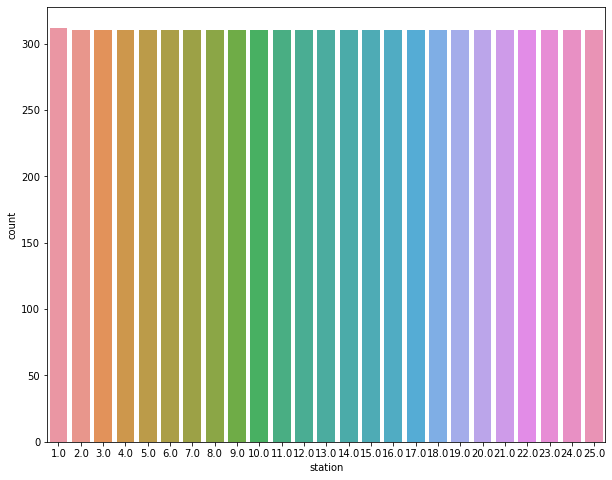

In [105]:
# Plotting the station column:
plt.figure(figsize=(10,8))
sns.countplot(df['station'])
df['station'].value_counts()

- There are 25 workstations in the given dataset.

<AxesSubplot:ylabel='station'>

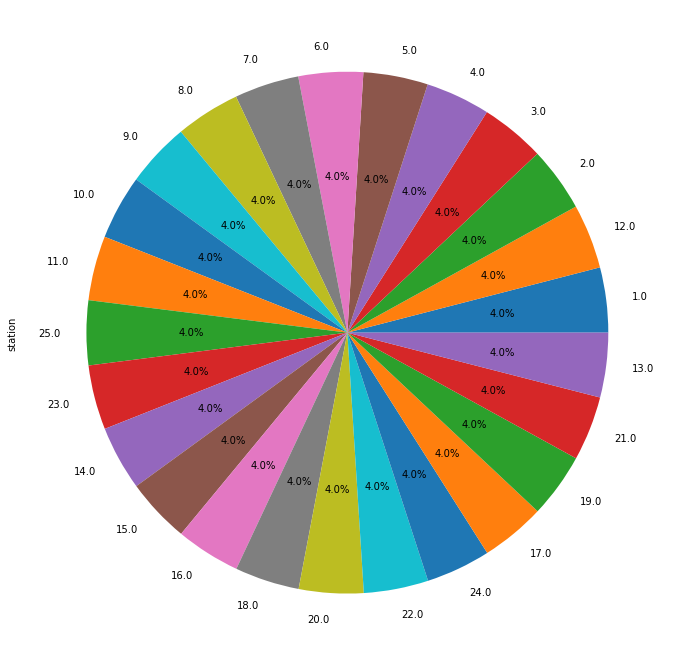

In [106]:
df['station'].value_counts().plot.pie(figsize = (12,12), autopct = '%.1f%%')

Minimum 20.0
Maximum 37.6


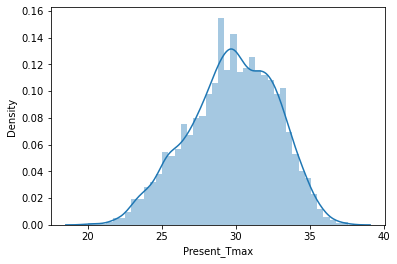

In [107]:
# Plotting the Present_Tmax column:
sns.distplot(df['Present_Tmax'])
print('Minimum',df['Present_Tmax'].min())
print('Maximum',df['Present_Tmax'].max())

- The present maximum temperature is quite normally distributed.
- The present maximum varies from 20.0 to 37.6 degree centrigrade.

Minimum 11.3
Maximum 29.9


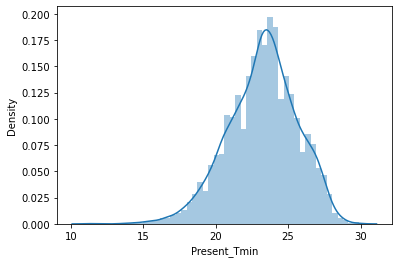

In [108]:
# Plotting the Present_Tmin column:
sns.distplot(df['Present_Tmin'])
print('Minimum',df['Present_Tmin'].min())
print('Maximum',df['Present_Tmin'].max())

- This column is having little left skewness.
- Present_Tmin column varries from 11.3-29.9 degree centrigade.

Minimum 19.79466629
Maximum 98.5247345


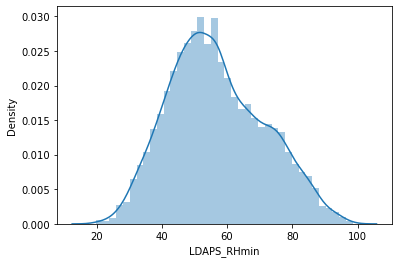

In [109]:
# Plotting the LDAPS_RHmin column:
sns.distplot(df['LDAPS_RHmin'])
print('Minimum',df['LDAPS_RHmin'].min())
print('Maximum',df['LDAPS_RHmin'].max())

- The coulumn is normally distributed and it varies from 19.79 to 98.52.

Minimum 58.93628311
Maximum 100.00015259999999


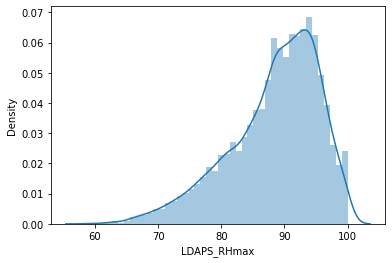

In [110]:
# Plotting the LDAPS_RHmax column:
sns.distplot(df['LDAPS_RHmax'])
print('Minimum',df['LDAPS_RHmax'].min())
print('Maximum',df['LDAPS_RHmax'].max())

- The column is haaving left skewness and the data varies in reading from 58.93628311 to 100.00015259999999.

Minimum 17.62495378
Maximum 38.54225522


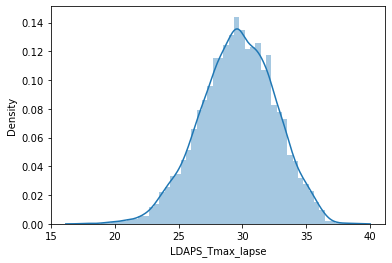

In [111]:
# Plotting LDAPS_Tmax_lapse column:
sns.distplot(df['LDAPS_Tmax_lapse'])
print('Minimum',df['LDAPS_Tmax_lapse'].min())
print('Maximum',df['LDAPS_Tmax_lapse'].max())

- The column is quite normally distributed and the column varries in reading  from 17.62495378 to 38.54225522.

Minimum 14.27264631
Maximum 29.61934244


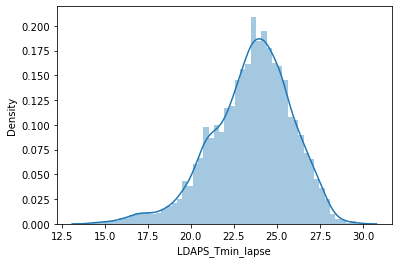

In [112]:
# Plotting the LDAPS_Tmin_lapse column:
sns.distplot(df['LDAPS_Tmin_lapse'])
print('Minimum',df['LDAPS_Tmin_lapse'].min())
print('Maximum',df['LDAPS_Tmin_lapse'].max())

- The column is slightly left skewed and it varies from minimum 14.27264631 to maximum 29.61934244.

Minimum 2.882579625
Maximum 21.85762099


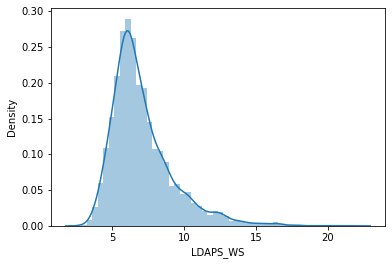

In [113]:
# plotting the LDAPS_WS column:
sns.distplot(df['LDAPS_WS'])
print('Minimum',df['LDAPS_WS'].min())
print('Maximum',df['LDAPS_WS'].max())

- The column is having right skewness ant it varies from max 21.85762099 to min 2.882579625.

Minimum -13.60321209
Maximum 213.4140062


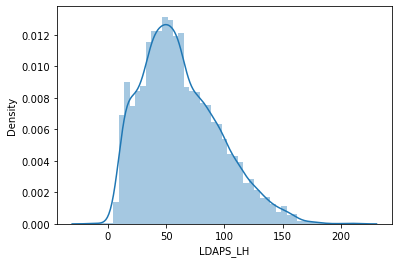

In [114]:
# Plotting the LDAPS_LH column:
sns.distplot(df['LDAPS_LH'])
print('Minimum',df['LDAPS_LH'].min())
print('Maximum',df['LDAPS_LH'].max())

- The latent heat column is rightly skewed and it varies in large extent from min of -13.60321209 and max of 213.4140062.

Minimum 0.0
Maximum 0.967277328


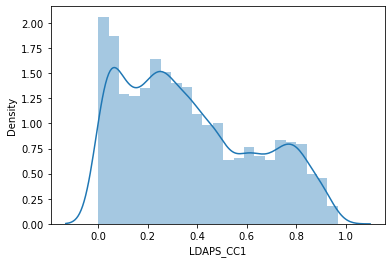

In [115]:
# Plotting the LDAPS_CC1 column:
sns.distplot(df['LDAPS_CC1'])
print('Minimum',df['LDAPS_CC1'].min())
print('Maximum',df['LDAPS_CC1'].max())

Minimum 0.0
Maximum 0.96835306


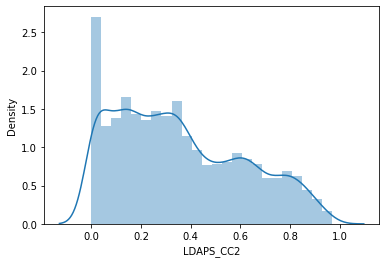

In [116]:
# Plotting the LDAPS_CC2 colum:
sns.distplot(df['LDAPS_CC2'])
print('Minimum',df['LDAPS_CC2'].min())
print('Maximum',df['LDAPS_CC2'].max())

Minimum 0.0
Maximum 0.983788755


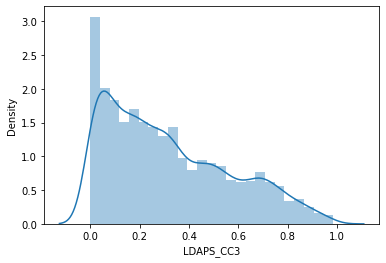

In [117]:
# Plotting the LDAPS_CC3' column:
sns.distplot(df['LDAPS_CC3'])
print('Minimum',df['LDAPS_CC3'].min())
print('Maximum',df['LDAPS_CC3'].max())

Minimum 0.0
Maximum 0.9747095240000001


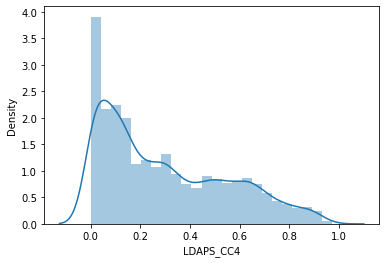

In [118]:
# plotting the LDAPS_CC4 column:
sns.distplot(df['LDAPS_CC4'])
print('Minimum',df['LDAPS_CC4'].min())
print('Maximum',df['LDAPS_CC4'].max())

- All the four split average column is Rightly skewed and all the min values of each column is 0 and the max value is close to 10.

Minimum 0.0
Maximum 23.70154408


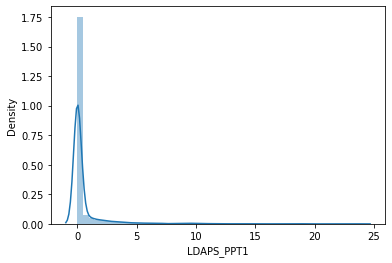

In [119]:
# Plotting the LDAPS_PPT1 column:
sns.distplot(df['LDAPS_PPT1'])
print('Minimum',df['LDAPS_PPT1'].min())
print('Maximum',df['LDAPS_PPT1'].max())

Minimum 0.0
Maximum 21.62166078


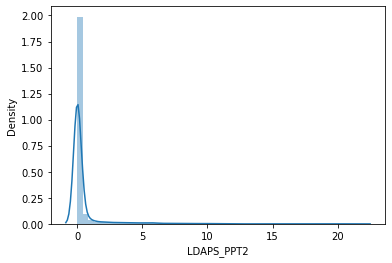

In [120]:
# Plotting the LDAPS_PPT2 column:
sns.distplot(df['LDAPS_PPT2'])
print('Minimum',df['LDAPS_PPT2'].min())
print('Maximum',df['LDAPS_PPT2'].max())

Minimum 0.0
Maximum 15.84123484


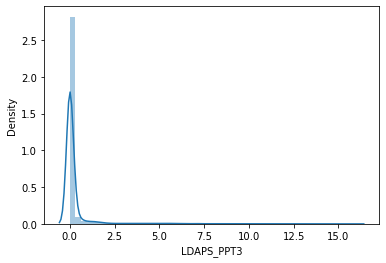

In [121]:
# Plotting the LDAPS_PPT3 column:
sns.distplot(df['LDAPS_PPT3'])
print('Minimum',df['LDAPS_PPT3'].min())
print('Maximum',df['LDAPS_PPT3'].max())

Minimum 0.0
Maximum 16.65546921


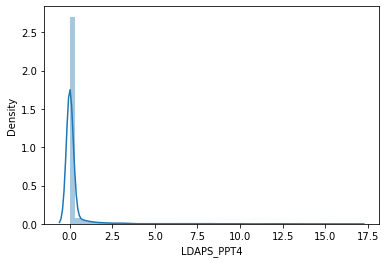

In [122]:
# Plotting the LDAPS_PPT3 column:
sns.distplot(df['LDAPS_PPT4'])
print('Minimum',df['LDAPS_PPT4'].min())
print('Maximum',df['LDAPS_PPT4'].max())

- All the split Average percipitation column is Rightly skewed and the min values of all the column is 0 and the highest values are in between 15-23.

Minimum 37.4562
Maximum 37.645


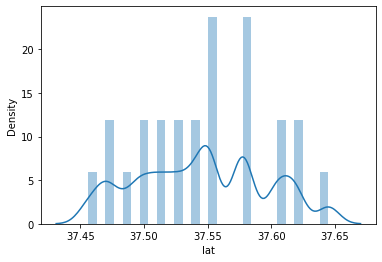

In [123]:
# Plotting the Lattitude column:
sns.distplot(df['lat'])
print('Minimum',df['lat'].min())
print('Maximum',df['lat'].max())

- The data variance is very less because the data collected here is of a single place.

Minimum 126.82600000000001
Maximum 127.135


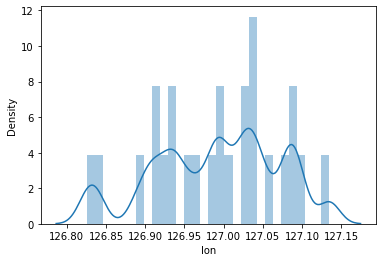

In [124]:
# Plotting the longitude column:
sns.distplot(df['lon'])
print('Minimum',df['lon'].min())
print('Maximum',df['lon'].max())

- The data variance of longitude column is very less because the data collected here is of a single place.

Minimum 12.37
Maximum 212.335


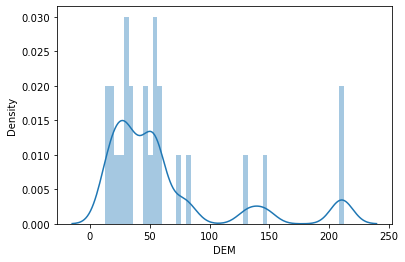

In [125]:
# Plotting the DEM column:
sns.distplot(df['DEM'])
print('Minimum',df['DEM'].min())
print('Maximum',df['DEM'].max())

- The minimum elevation of the place recorded is 12.37m and the maximum elevation is 212.335m.

Minimum 0.09847460000000001
Maximum 5.17823


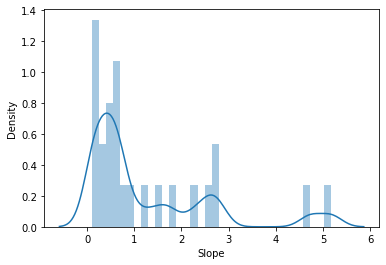

In [126]:
# Plotting the Slope column:
sns.distplot(df['Slope'])
print('Minimum',df['Slope'].min())
print('Maximum',df['Slope'].max())

- The minimum slope of the place is 0.09847460000000001 and the maximum slope is 5.17823.

Minimum 4329.520508
Maximum 5992.895996


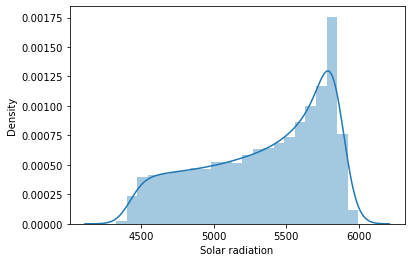

In [127]:
# plotting So;ar Radiation column:
sns.distplot(df['Solar radiation'])
print('Minimum',df['Solar radiation'].min())
print('Maximum',df['Solar radiation'].max())

- The solar radiation column is little bit left skewed ann the minimumsolar radiation is 4329.520508 and maximum solar radiation is Maximum 5992.895996. 

Minimum 17.4
Maximum 38.9


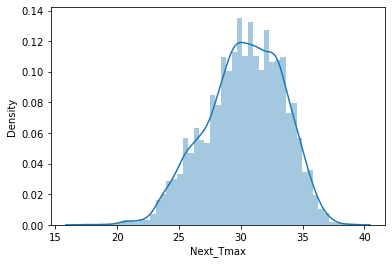

In [128]:
# Plotting the Next_Tmax column:
sns.distplot(df['Next_Tmax'])
print('Minimum',df['Next_Tmax'].min())
print('Maximum',df['Next_Tmax'].max())

- The target column shows normal distribution.

Minimum 11.3
Maximum 29.8


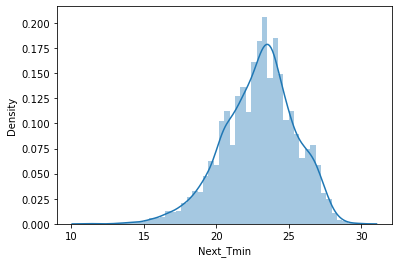

In [129]:
#Plotting the Next_Tmin column:
sns.distplot(df['Next_Tmin'])
print('Minimum',df['Next_Tmin'].min())
print('Maximum',df['Next_Tmin'].max())

- The target column shows somewhat normal distribution.

# BI VARIATE ANALYSIS:

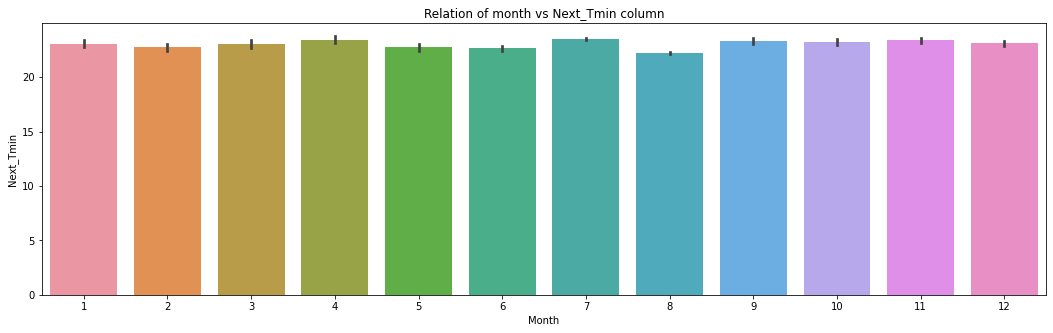

In [130]:
# Plotting month vs Next_Tmin column:
plt.figure(figsize=(18,5))
sns.barplot(x='Month',y='Next_Tmin',data=df).set_title('Relation of month vs Next_Tmin column')
plt.show()

- The Next_Tmin is average throuhout the month.

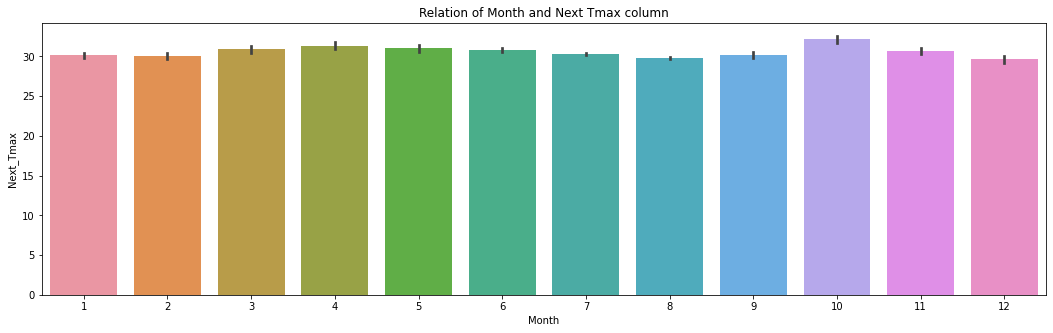

In [131]:
# Plotting the Month and Next Tmax column:
plt.figure(figsize=(18,5))
sns.barplot(x='Month',y='Next_Tmax',data=df).set_title('Relation of Month and Next Tmax column')
plt.show()

- The Next_Tmax is average throuhout the month.

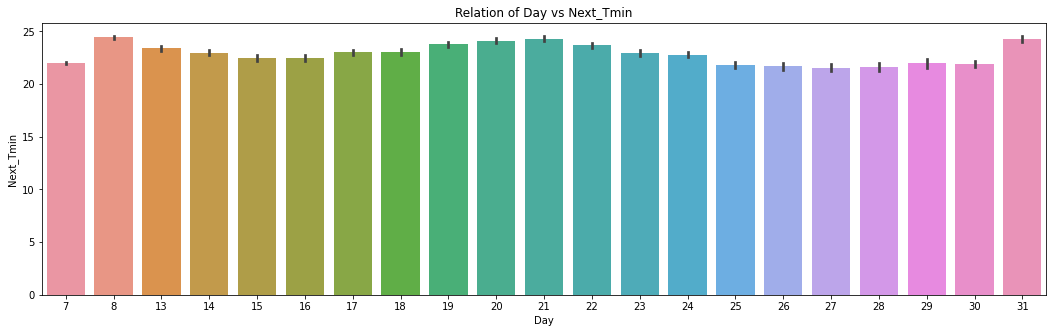

In [132]:
# Plotting Day vs Next_Tmin' column:
plt.figure(figsize=(18,5))
sns.barplot(x='Day',y='Next_Tmin',data=df).set_title('Relation of Day vs Next_Tmin')
plt.show()

- The Next_Tmin is above 20 degree centrigrade throughout the month.

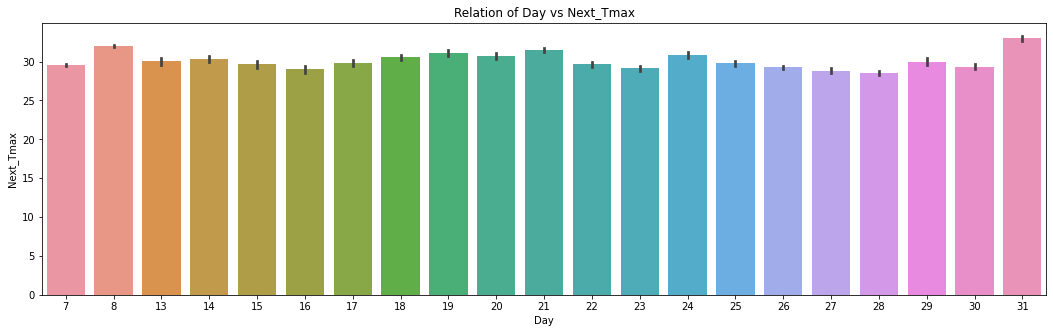

In [133]:
# Plotting the Day vs Next_Tmax:
plt.figure(figsize=(18,5))
sns.barplot(x='Day',y='Next_Tmax',data=df).set_title('Relation of Day vs Next_Tmax')
plt.show()

- The Next_Tmax is above 30 degree centrigrade throughout the month.

In [134]:
# Separating all the continuous features:
columns=['station','Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation']

In [135]:
# Plotting the relations with the target variable:

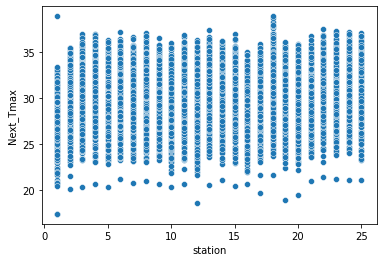

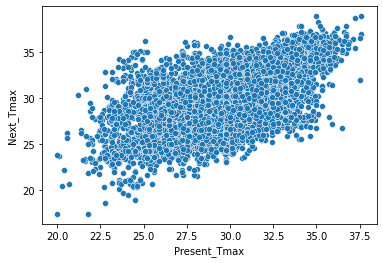

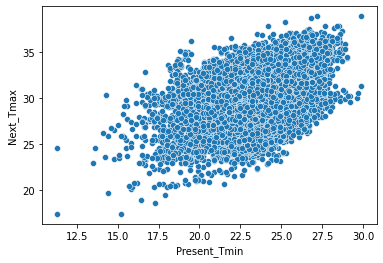

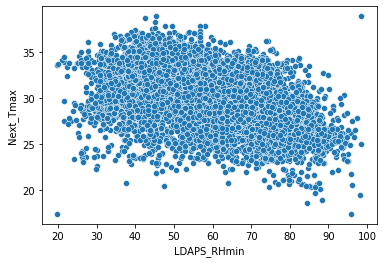

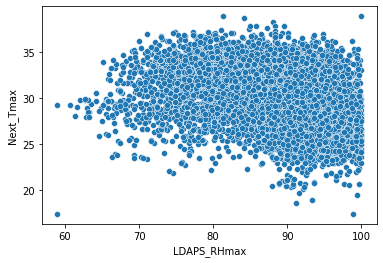

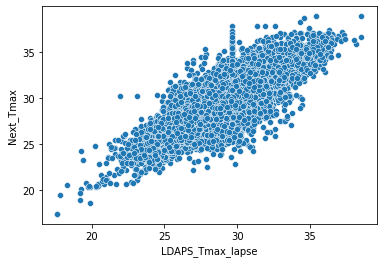

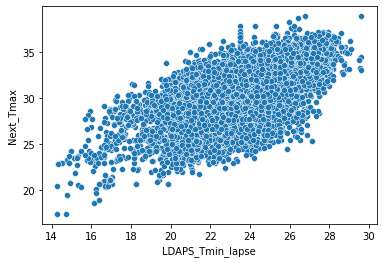

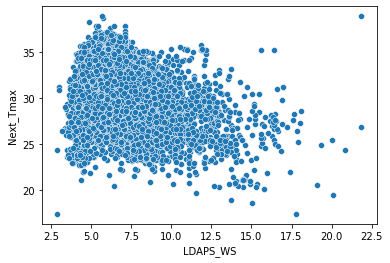

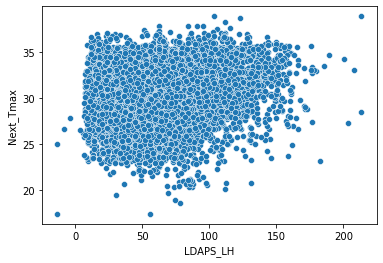

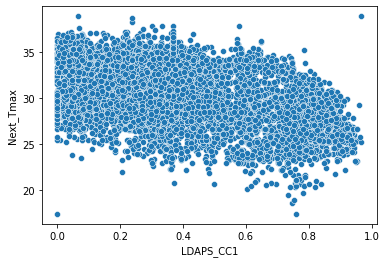

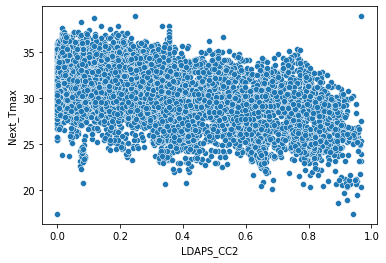

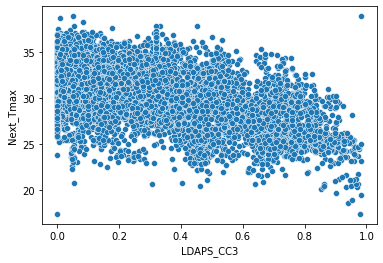

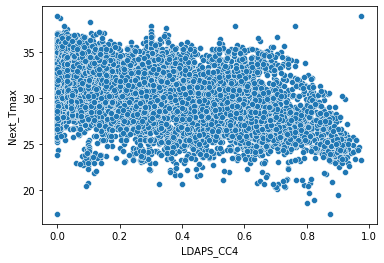

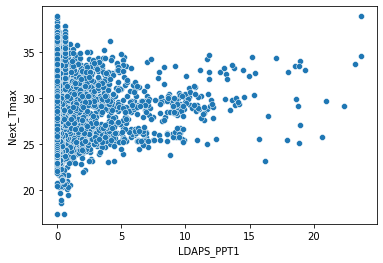

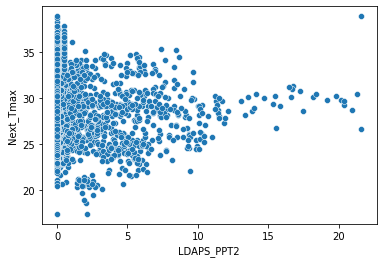

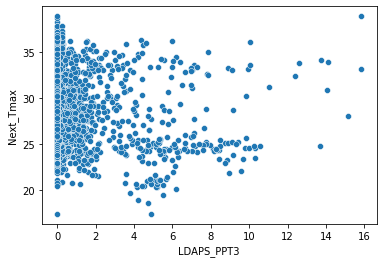

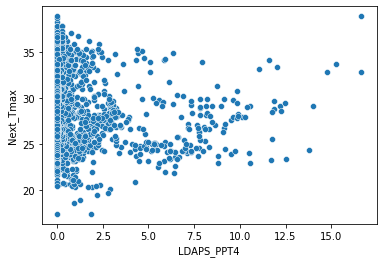

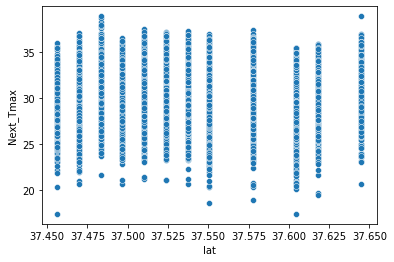

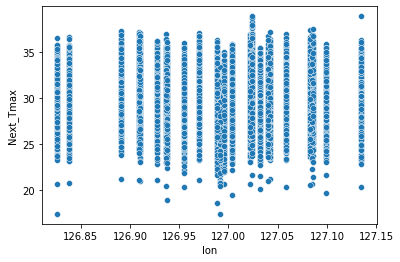

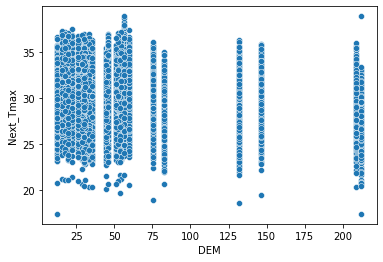

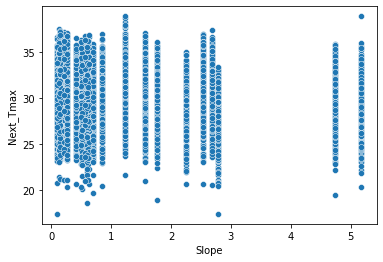

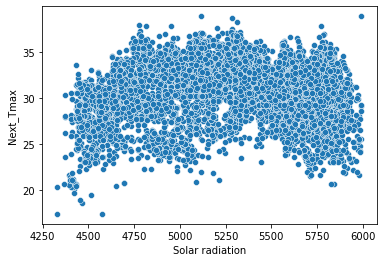

In [136]:
for i in columns:
    sns.scatterplot(x=i,y='Next_Tmax',data=df)
    plt.show()

- Next_Tmax and Next_Tmin has positive relation with Present_Tmax and Present_Tmin.
- Increase in Laspe increases the next day temperature
- CC has the negative impact and increase in CC can reduce the nxt day temperature.
- Lat and Lon has no relation with the increase or decrease in temperature.
- temperature decreases with the increase in DEM.

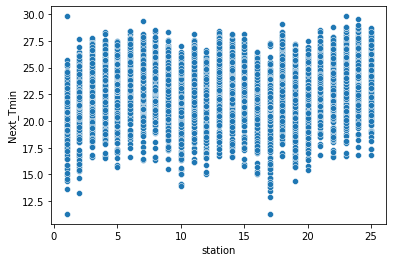

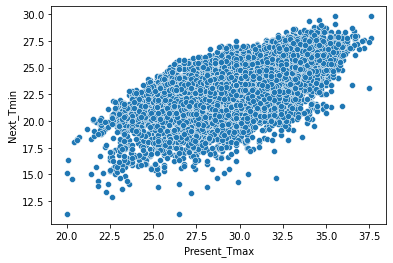

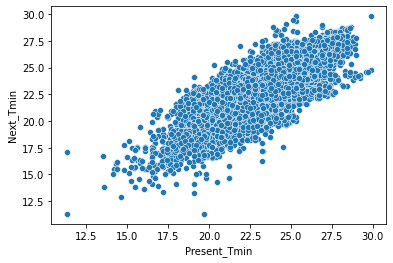

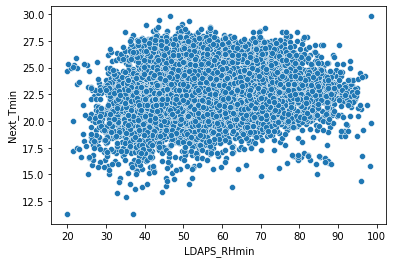

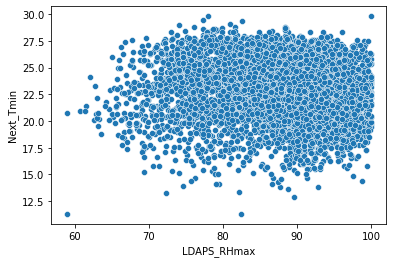

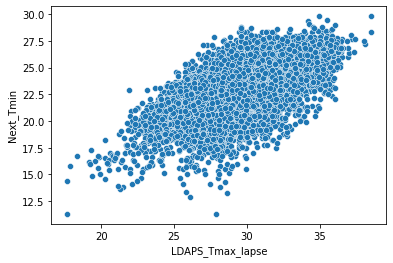

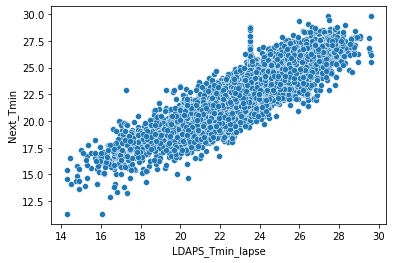

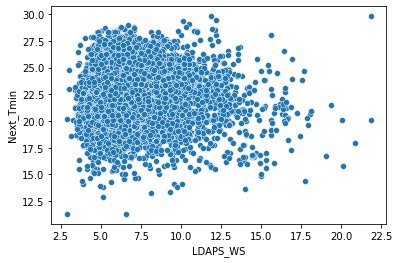

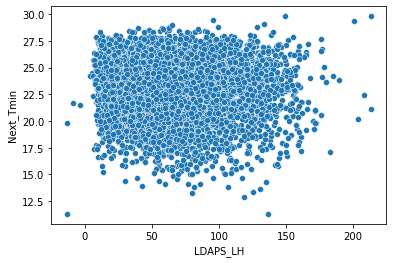

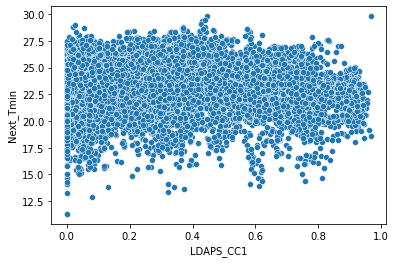

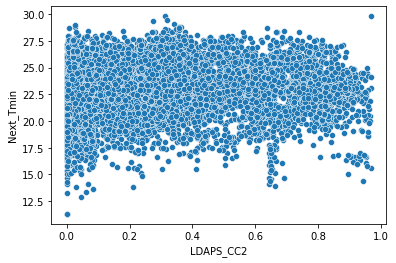

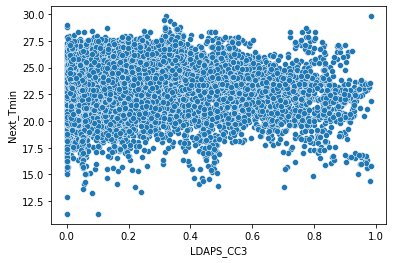

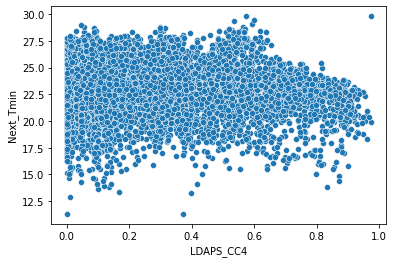

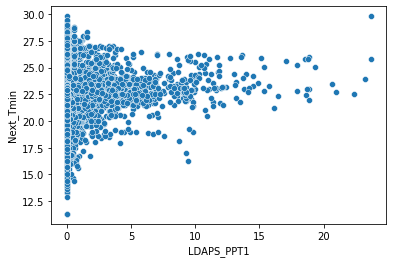

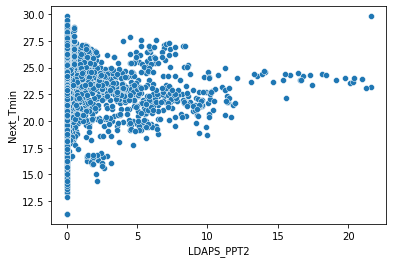

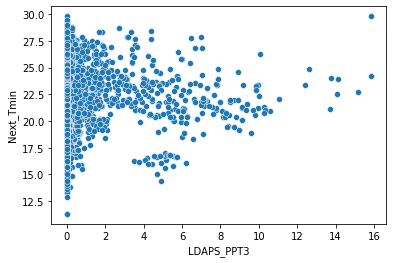

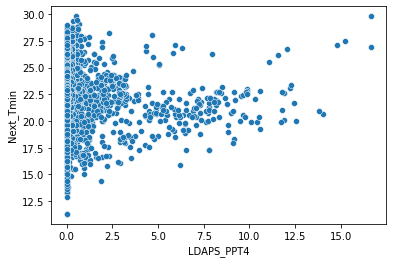

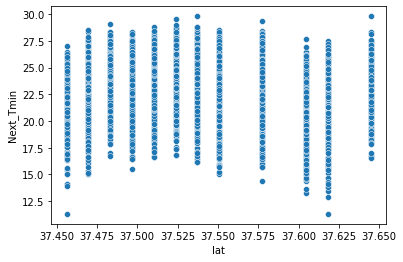

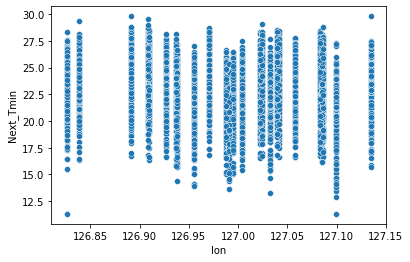

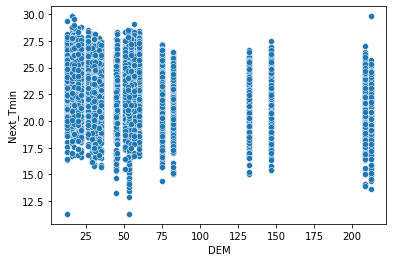

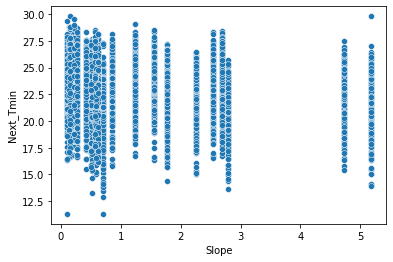

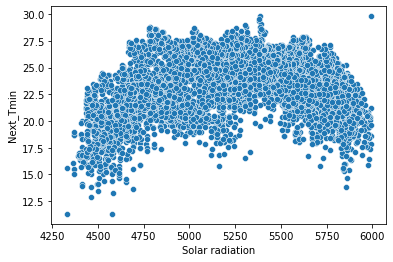

In [137]:
for i in columns:
    sns.scatterplot(x=i,y='Next_Tmin',data=df)
    plt.show()

- Next_Tmax and Next_Tmin has positive relation with Present_Tmax and Present_Tmin.
- Increase in Laspe increases the next day temperature
- CC has the negative impact and increase in CC can reduce the nxt day temperature.
- Lat and Lon has no relation with the increase or decrease in temperature.
- temperature decreases with the increase in DEM.

In [138]:
# Checking normal distribution:

array([[<AxesSubplot:title={'center':'station'}>,
        <AxesSubplot:title={'center':'Present_Tmax'}>,
        <AxesSubplot:title={'center':'Present_Tmin'}>,
        <AxesSubplot:title={'center':'LDAPS_RHmin'}>,
        <AxesSubplot:title={'center':'LDAPS_RHmax'}>],
       [<AxesSubplot:title={'center':'LDAPS_Tmax_lapse'}>,
        <AxesSubplot:title={'center':'LDAPS_Tmin_lapse'}>,
        <AxesSubplot:title={'center':'LDAPS_WS'}>,
        <AxesSubplot:title={'center':'LDAPS_LH'}>,
        <AxesSubplot:title={'center':'LDAPS_CC1'}>],
       [<AxesSubplot:title={'center':'LDAPS_CC2'}>,
        <AxesSubplot:title={'center':'LDAPS_CC3'}>,
        <AxesSubplot:title={'center':'LDAPS_CC4'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT1'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT2'}>],
       [<AxesSubplot:title={'center':'LDAPS_PPT3'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT4'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}

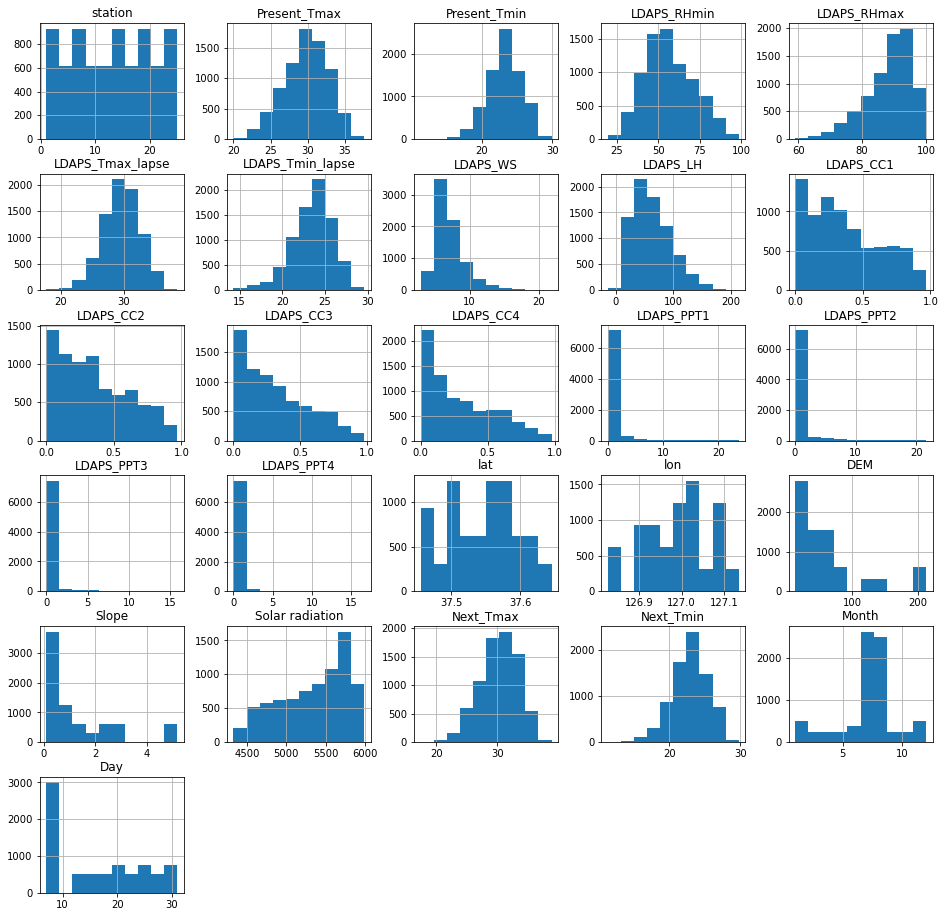

In [139]:
df.hist(figsize=(16,16))

- Mostly temperature is between 28 to 33 degree.
- PpT1-PPT4 has mostly one value.
- Major Data is from Jul and Aug month.

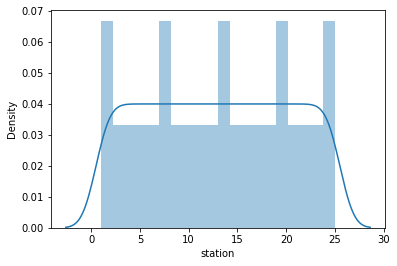

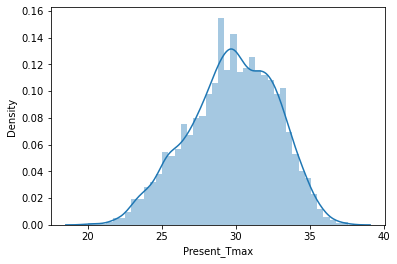

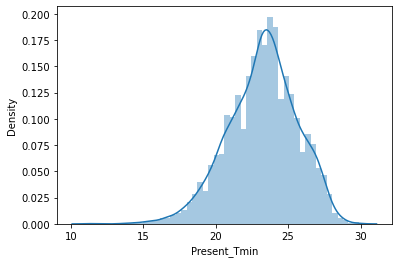

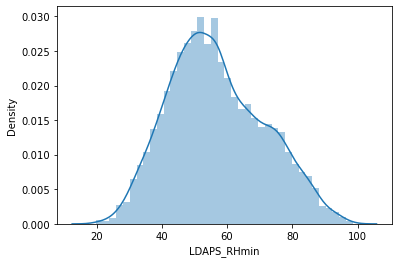

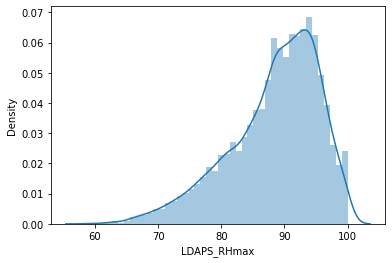

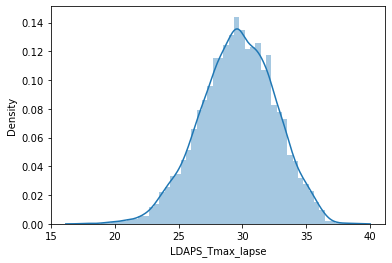

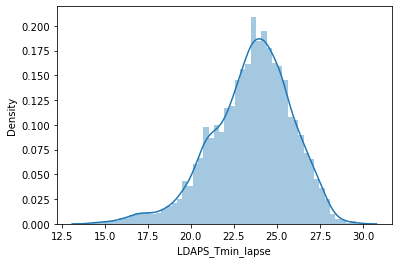

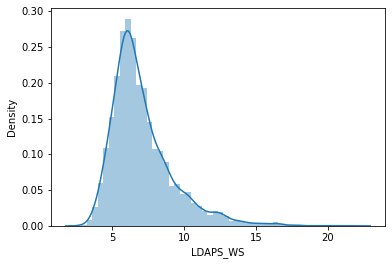

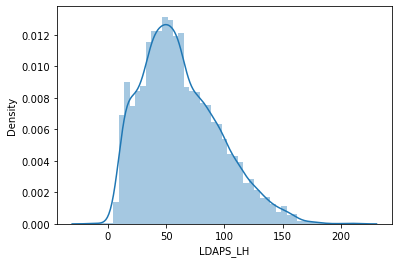

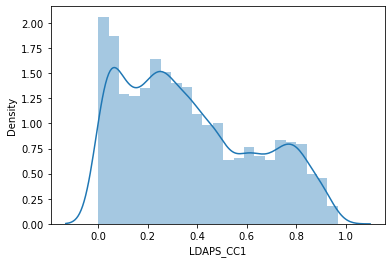

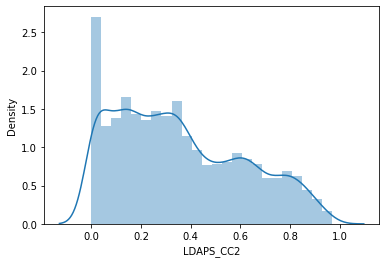

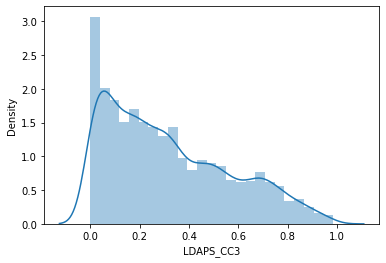

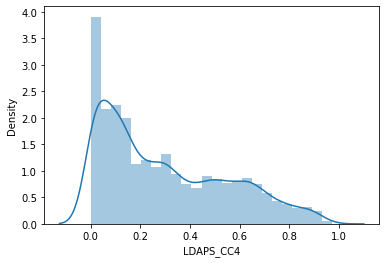

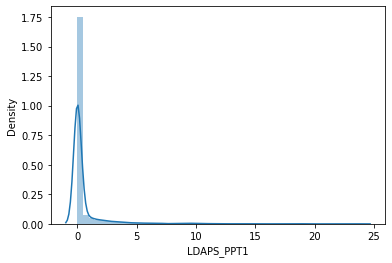

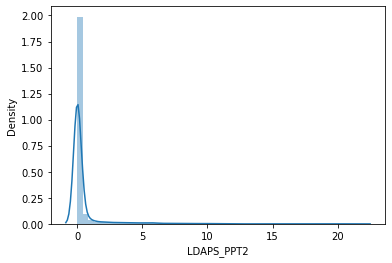

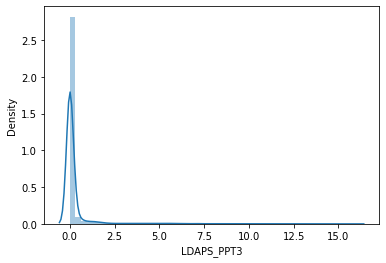

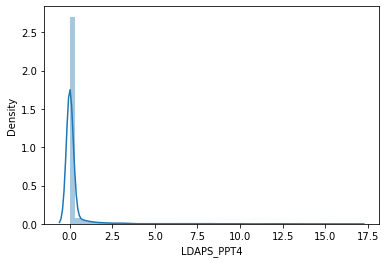

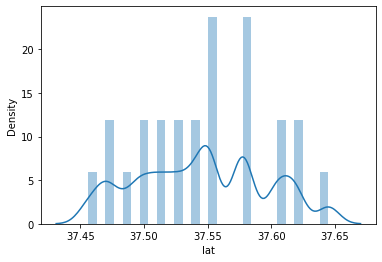

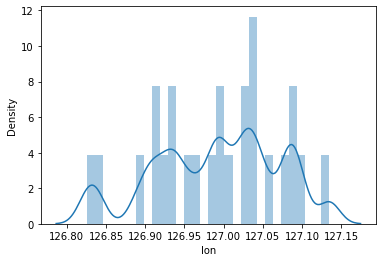

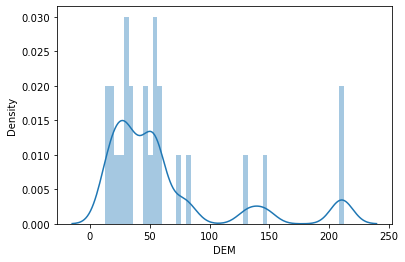

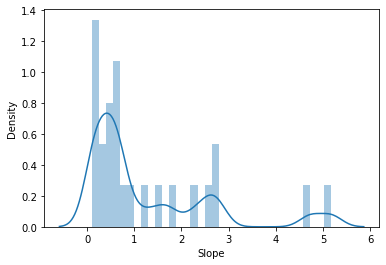

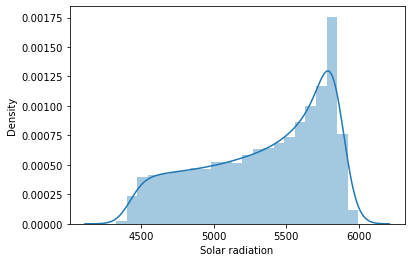

In [140]:
for i in columns:
    sns.distplot(df[i])
    plt.show()

- Present_Tmax and Tmax_lapse are close to normal distribuion
- RHmax is right skewed.
- WS left skewed.
- LH is slightly left skewed.
- PPT1-PPT4 all are left skewed

station                AxesSubplot(0.125,0.772143;0.110714x0.107857)
Present_Tmax        AxesSubplot(0.257857,0.772143;0.110714x0.107857)
Present_Tmin        AxesSubplot(0.390714,0.772143;0.110714x0.107857)
LDAPS_RHmin         AxesSubplot(0.523571,0.772143;0.110714x0.107857)
LDAPS_RHmax         AxesSubplot(0.656429,0.772143;0.110714x0.107857)
LDAPS_Tmax_lapse    AxesSubplot(0.789286,0.772143;0.110714x0.107857)
LDAPS_Tmin_lapse       AxesSubplot(0.125,0.642714;0.110714x0.107857)
LDAPS_WS            AxesSubplot(0.257857,0.642714;0.110714x0.107857)
LDAPS_LH            AxesSubplot(0.390714,0.642714;0.110714x0.107857)
LDAPS_CC1           AxesSubplot(0.523571,0.642714;0.110714x0.107857)
LDAPS_CC2           AxesSubplot(0.656429,0.642714;0.110714x0.107857)
LDAPS_CC3           AxesSubplot(0.789286,0.642714;0.110714x0.107857)
LDAPS_CC4              AxesSubplot(0.125,0.513286;0.110714x0.107857)
LDAPS_PPT1          AxesSubplot(0.257857,0.513286;0.110714x0.107857)
LDAPS_PPT2          AxesSubplot(0.

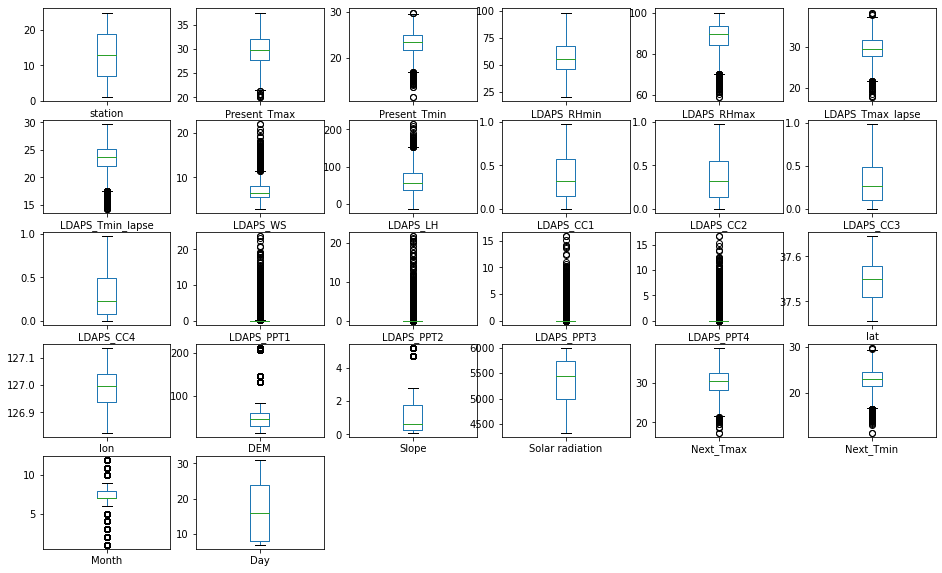

In [141]:
#checking for outliers using boxplt:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(16,12))

- Having outliers in Month,Next_TMax,NextTmin,PPT columns,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Present_Tmax,Present_Tmin,LDAPS_RHmax and LDAPS_Tmax_lapse column.we will remove outliers latter.

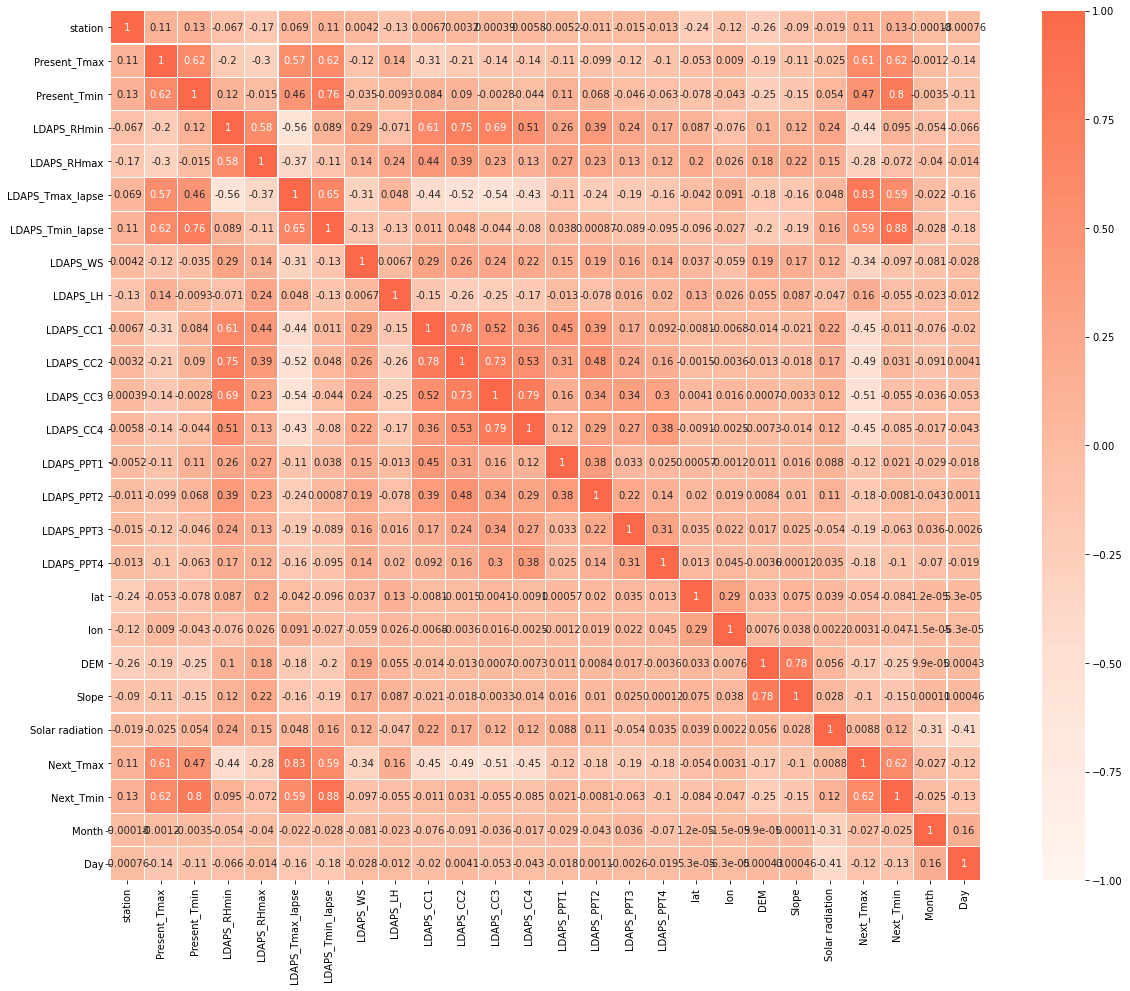

In [142]:
# Checjing Multi colinearity:
corr=df.corr()
plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='Reds',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()


- Next_Tmax has the strong corelation with CC1-CC4 and weakeest with longtitude.

- Next_Tmax and Next_Tmin is strongly corelated with Tmax_lapse and Tmin_lapse respectively.

- CC1 and CC2 are strongly corelated to each other. CC3 and CC4 are also strongly corelated.

- DEM and Slope has a strong corelation among themselves.

- From above we can conclude that many features are corelated to each other.

In [143]:
corr = df.corr()
corr

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.112756      0.132068    -0.066780   
Present_Tmax      0.112756      1.000000      0.618760    -0.204571   
Present_Tmin      0.132068      0.618760      1.000000     0.123143   
LDAPS_RHmin      -0.066780     -0.204571      0.123143     1.000000   
LDAPS_RHmax      -0.166391     -0.301787     -0.015140     0.579141   
LDAPS_Tmax_lapse  0.069306      0.570129      0.464151    -0.564580   
LDAPS_Tmin_lapse  0.105009      0.623496      0.762993     0.089476   
LDAPS_WS          0.004234     -0.121820     -0.034675     0.294361   
LDAPS_LH         -0.133787      0.135463     -0.009258    -0.070858   
LDAPS_CC1         0.006728     -0.311805      0.084447     0.613818   
LDAPS_CC2         0.003181     -0.213791      0.090263     0.745443   
LDAPS_CC3         0.000395     -0.144018     -0.002772     0.689679   
LDAPS_CC4         0.005805     -0.140729     -0.044335     0.514075   
LDAPS_PPT1       -0.005204     -0.109006      0.112845     0.262665   
LDAPS_PPT2       -0.010773     -0.099449      0.068176     0.390967   
LDAPS_PPT3       -0.015294     -0.120367     -0.046126     0.240642   
LDAPS_PPT4       -0.013279     -0.099607     -0.062965     0.168595   
lat              -0.237467     -0.052615     -0.078475     0.087099   
lon              -0.118603      0.009020     -0.043461    -0.076237   
DEM              -0.256138     -0.187121     -0.250275     0.102115   
Slope            -0.090461     -0.105809     -0.146339     0.123744   
Solar radiation  -0.018814     -0.025439      0.053578     0.244080   
Next_Tmax         0.108236      0.610348      0.471806    -0.437898   
Next_Tmin         0.128659      0.622741      0.796670     0.095019   
Month            -0.000176     -0.001185     -0.003550    -0.053922   
Day              -0.000762     -0.143899     -0.108728    -0.065735   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166391          0.069306          0.105009  0.004234   
Present_Tmax        -0.301787          0.570129          0.623496 -0.121820   
Present_Tmin        -0.015140          0.464151          0.762993 -0.034675   
LDAPS_RHmin          0.579141         -0.564580          0.089476  0.294361   
LDAPS_RHmax          1.000000         -0.373404         -0.114143  0.135333   
LDAPS_Tmax_lapse    -0.373404          1.000000          0.654021 -0.311996   
LDAPS_Tmin_lapse    -0.114143          0.654021          1.000000 -0.130035   
LDAPS_WS             0.135333         -0.311996         -0.130035  1.000000   
LDAPS_LH             0.238579          0.048010         -0.134761  0.006711   
LDAPS_CC1            0.436652         -0.438439          0.010901  0.289445   
LDAPS_CC2            0.391330         -0.523619          0.047727  0.261090   
LDAPS_CC3            0.226957         -0.541327         -0.044018  0.242991   
LDAPS_CC4            0.130619         -0.429539         -0.080335  0.220533   
LDAPS_PPT1           0.268449         -0.111065          0.038056  0.152587   
LDAPS_PPT2           0.229050         -0.242122          0.000870  0.191886   
LDAPS_PPT3           0.134607         -0.188115         -0.088575  0.161684   
LDAPS_PPT4           0.117853         -0.160273         -0.094655  0.144085   
lat                  0.195798         -0.042093         -0.096257  0.036657   
lon                  0.025667          0.090666         -0.026701 -0.059466   
DEM                  0.177168         -0.178895         -0.195455  0.191053   
Slope                0.219599         -0.162332         -0.185849  0.171629   
Solar radiation      0.149261          0.047971          0.159975  0.121759   
Next_Tmax           -0.283738          0.827189          0.586983 -0.342729   
Next_Tmin           -0.071997          0.586868          0.880176 -0.096576   
Month               -0.040121         -0.021745         -0.027566 -0.081029   
Day                 -0.013571         -0.160495

- Next_Tmax has the strong corelation with CC1-CC4 and weakeest with longtitude.

- Next_Tmax and Next_Tmin is strongly corelated with Tmax_lapse and Tmin_lapse respectively.

- CC1 and CC2 are strongly corelated to each other. CC3 and CC4 are also strongly corelated.

- DEM and Slope has a strong corelation among themselves.

- From above we can conclude that many features are corelated to each other.

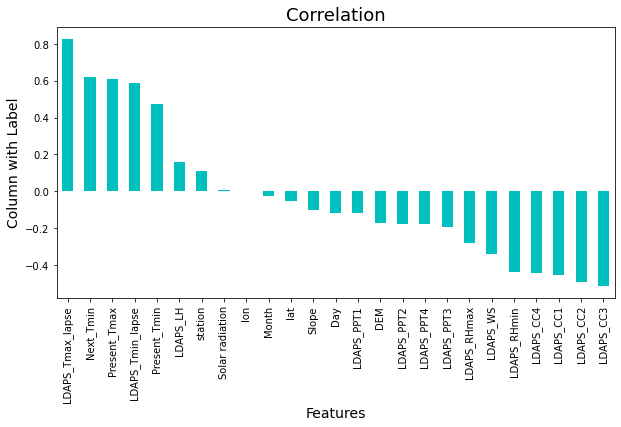

In [144]:
# checking ccorelation with the feeatures:
plt.figure(figsize=(10,5))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with Label',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- we can see that which columns are positively and negatively co related to Next_Tmax.
- highly positively co related with Ldaps_Tmax_Lapse.
- No co relation with lomgitude column.
- Least positively co realted with Solar Radiation.

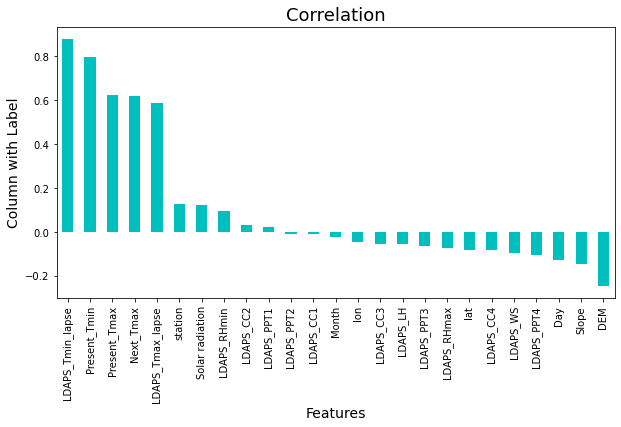

In [145]:
# checking co-relation with the features:
plt.figure(figsize=(10,5))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with Label',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- Next_Tmin is highly co related with LDAPS TIME LAPSE.
- Least corelated with LDAPS PPT2.

In [146]:
# CHECKING SKEWNESS:
df.skew()

station             0.000100
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Month              -0.705586
Day                 0.245283
dtype: float64

- We have skewness in this columns,'LDAPS_WS','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM' and'Slope'.we will remove the skewness with Power Transformer.

# SKEWNESS REMOVAL:

In [147]:
features=['LDAPS_WS','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']  #Features those having skewness

In [148]:
scaler=PowerTransformer(method='yeo-johnson')     #using power transformer

In [149]:
df[features]=scaler.fit_transform(df[features].values)

In [150]:
df[features]

LDAPS_WS  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM  \
0     0.093387   -0.570471   -0.532418   -0.505596   -0.458389  1.834978   
1    -0.625565   -0.570471   -0.532418   -0.505596   -0.458389  0.055979   
2    -0.314874   -0.570471   -0.532418   -0.505596   -0.458389 -0.364575   
3    -0.656732   -0.570471   -0.532418   -0.505596   -0.458389  0.084879   
4    -0.593836   -0.570471   -0.532418   -0.505596   -0.458389 -0.290442   
...        ...         ...         ...         ...         ...       ...   
7747 -0.307886   -0.570471   -0.532418   -0.505596   -0.458389 -1.578128   
7748 -0.063701   -0.570471   -0.532418   -0.505596   -0.458389 -1.400633   
7749  0.337939   -0.570471   -0.532418   -0.505596   -0.458389 -1.193124   
7750 -4.119648   -0.570471   -0.532418   -0.505596   -0.458389 -1.985144   
7751  3.033873    2.163899    2.336183    2.512023    2.631958  1.834978   

         Slope  
0     1.314153  
1    -0.385336  
2    -0.949164  
3     1.235263  
4    -0.401730  
...        ...  
7747 -1.280447  
7748 -1.072947  
7749 -0.935044  
7750 -1.477264  
7751  1.742163  

[7752 rows x 7 columns]

In [151]:
df.skew()

station             0.000100
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            0.002408
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          1.404189
LDAPS_PPT2          1.577808
LDAPS_PPT3          1.747820
LDAPS_PPT4          1.963848
lat                 0.087062
lon                -0.285213
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Month              -0.705586
Day                 0.245283
dtype: float64

- We still have skewness in the PPT columns.we will not delete this  datas.

In [152]:
# Drop Alert:
drop_columns=['station']
df=df.drop(columns=drop_columns,axis=1)

- Dropping the Station column because it is nothing but acting as the seial numbers.

In [153]:
df.head()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0          28.7          21.4    58.255688    91.116364         28.074101   
1          31.9          21.6    52.263397    90.604721         29.850689   
2          31.6          23.3    48.690479    83.973587         30.091292   
3          32.0          23.4    58.239788    96.483688         29.704629   
4          31.4          21.9    56.174095    90.155128         29.113934   

   LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0         23.006936  0.093387   69.451805   0.233947   0.203896  ...   
1         24.035009 -0.625565   51.937448   0.225508   0.251771  ...   
2         24.565633 -0.314874   20.573050   0.209344   0.257469  ...   
3         23.326177 -0.656732   65.727144   0.216372   0.226002  ...   
4         23.486480 -0.593836  107.965535   0.151407   0.249995  ...   

   LDAPS_PPT4      lat      lon       DEM     Slope  Solar radiation  \
0   -0.458389  37.6046  126.991  1.834978  1.314153      5992.895996   
1   -0.458389  37.6046  127.032  0.055979 -0.385336      5869.312500   
2   -0.458389  37.5776  127.058 -0.364575 -0.949164      5863.555664   
3   -0.458389  37.6450  127.022  0.084879  1.235263      5856.964844   
4   -0.458389  37.5507  127.135 -0.290442 -0.401730      5859.552246   

   Next_Tmax  Next_Tmin  Month  Day  
0       29.1       21.2      6   30  
1       30.5       22.5      6   30  
2       31.1       23.9      6   30  
3       31.7       24.3      6   30  
4       31.2       22.5      6   30  

[5 rows x 25 columns]

In [154]:
# dividing features and target values:

In [155]:
# defining variable for train test split.
df.reset_index(drop=True, inplace=True)
x = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y = df[['Next_Tmax', 'Next_Tmin']]

In [156]:
x.shape

(7752, 23)

# STANDARDIZATION:

In [157]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0             28.7          21.4    58.255688    91.116364         28.074101   
1             31.9          21.6    52.263397    90.604721         29.850689   
2             31.6          23.3    48.690479    83.973587         30.091292   
3             32.0          23.4    58.239788    96.483688         29.704629   
4             31.4          21.9    56.174095    90.155128         29.113934   
...            ...           ...          ...          ...               ...   
7747          23.3          17.1    26.741310    78.869858         26.352081   
7748          23.3          17.7    24.040634    77.294975         27.010193   
7749          23.2          17.4    22.933014    77.243744         27.939516   
7750          20.0          11.3    19.794666    58.936283         17.624954   
7751          37.6          29.9    98.524734   100.000153         38.542255   

      LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0            23.006936  0.093387   69.451805   0.233947   0.203896  ...   
1            24.035009 -0.625565   51.937448   0.225508   0.251771  ...   
2            24.565633 -0.314874   20.573050   0.209344   0.257469  ...   
3            23.326177 -0.656732   65.727144   0.216372   0.226002  ...   
4            23.486480 -0.593836  107.965535   0.151407   0.249995  ...   
...                ...       ...         ...        ...        ...  ...   
7747         18.775678 -0.307886   72.058294   0.030034   0.081035  ...   
7748         18.733519 -0.063701   47.241457   0.035874   0.074962  ...   
7749         18.522965  0.337939    9.090034   0.048954   0.059869  ...   
7750         14.272646 -4.119648  -13.603212   0.000000   0.000000  ...   
7751         29.619342  3.033873  213.414006   0.967277   0.968353  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0      -0.532418   -0.505596   -0.458389  37.6046  126.991  1.834978   
1      -0.532418   -0.505596   -0.458389  37.6046  127.032  0.055979   
2      -0.532418   -0.505596   -0.458389  37.5776  127.058 -0.364575   
3      -0.532418   -0.505596   -0.458389  37.6450  127.022  0.084879   
4      -0.532418   -0.505596   -0.458389  37.5507  127.135 -0.290442   
...          ...         ...         ...      ...      ...       ...   
7747   -0.532418   -0.505596   -0.458389  37.5372  126.891 -1.578128   
7748   -0.532418   -0.505596   -0.458389  37.5237  126.909 -1.400633   
7749   -0.532418   -0.505596   -0.458389  37.5237  126.970 -1.193124   
7750   -0.532418   -0.505596   -0.458389  37.4562  126.826 -1.985144   
7751    2.336183    2.512023    2.631958  37.6450  127.135  1.834978   

         Slope  Solar radiation  Month  Day  
0     1.314153      5992.895996      6   30  
1    -0.385336      5869.312500      6   30  
2    -0.949164      5863.555664      6   30  
3     1.235263      5856.964844      6   30  
4    -0.401730      5859.552246      6   30  
...        ...              ...    ...  ...  
7747 -1.280447      4443.313965      8   30  
7748 -1.072947      4438.373535      8   30  
7749 -0.935044      4451.345215      8   30  
7750 -1.477264      4329.520508      8   31  
7751  1.742163      5992.895996      8   31  

[7752 rows x 23 columns]

# VIF:

In [158]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

vif          Features
0   2.863525      Present_Tmax
1   3.103307      Present_Tmin
2   6.433743       LDAPS_RHmin
3   2.246736       LDAPS_RHmax
4   7.610718  LDAPS_Tmax_lapse
5   7.354984  LDAPS_Tmin_lapse
6   1.227347          LDAPS_WS
7   1.523176          LDAPS_LH
8   5.020591         LDAPS_CC1
9   6.075658         LDAPS_CC2
10  5.806984         LDAPS_CC3
11  3.336378         LDAPS_CC4
12  2.587552        LDAPS_PPT1
13  2.361604        LDAPS_PPT2
14  1.950478        LDAPS_PPT3
15  1.953304        LDAPS_PPT4
16  1.210537               lat
17  1.225081               lon
18  2.866606               DEM
19  2.723602             Slope
20  1.547143   Solar radiation
21  1.133197             Month
22  1.284961               Day

# HOLD OUT METHOD:

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=21)

# BUILDING MODELS:

# 1.KNEIGHBORS REGRESSOR:

In [161]:
#Model Training
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [162]:
#Prediction with trained data:
yknpred = kn.predict(x_train)

In [163]:
print("R Square Score of kn:", metrics.r2_score(y_train,yknpred))

R Square Score of kn: 0.9225149883550439


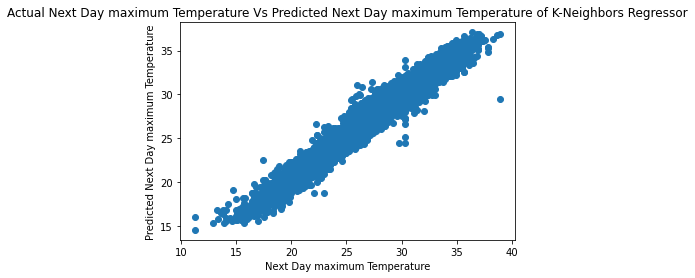

In [164]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yknpred)
plt.xlabel('Next Day maximum Temperature')
plt.ylabel('Predicted Next Day maximum Temperature')
plt.title('Actual Next Day maximum Temperature Vs Predicted Next Day maximum Temperature of K-Neighbors Regressor')
plt.show()

In [165]:

# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

In [166]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)

R Square Score of K-Neighbors Regressor: 0.8865713968065555


In [167]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  0.7112062821244998


In [168]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  0.9048420946017721


In [169]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  0.9512318826667723


# 2. ADABOOST REGRESSOR:

In [288]:
#Model Training
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [289]:
#Prediction with trained data:
yabrpred = abr.predict(x_train)

In [290]:
print("R Square Score of AdaBoostRegressor:", metrics.r2_score(y_train,yabrpred))

R Square Score of AdaBoostRegressor: 0.7582184160591009


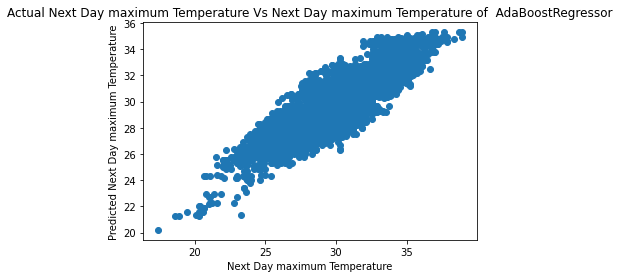

In [291]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yabrpred)
plt.xlabel('Next Day maximum Temperature')
plt.ylabel('Predicted Next Day maximum Temperature')
plt.title('Actual Next Day maximum Temperature Vs Next Day maximum Temperature of  AdaBoostRegressor')
plt.show()

In [292]:
# Predicting test data with model:
y_test_abr_pred = abr.predict(x_test)

In [293]:
abr_accuracy = metrics.r2_score(y_test,y_test_abr_pred)
print("R Square Score of AdaBoostRegressor:",abr_accuracy)

R Square Score of AdaBoostRegressor: 0.7481286121755082


In [294]:
print ('mean absolute error of AdaBoostRegressor: ',mean_absolute_error(y_test,y_test_abr_pred))

mean absolute error of AdaBoostRegressor:  1.270184916027808


In [295]:
print ('mean squared error of AdaBoostRegressor: ',mean_squared_error(y_test,y_test_abr_pred))

mean squared error of AdaBoostRegressor:  2.4646025720657017


In [296]:
print ('Root mean squared error of AdaBoostRegressor: ',np.sqrt(mean_squared_error(y_test,y_test_abr_pred)))

Root mean squared error of AdaBoostRegressor:  1.5699052748703348


# 3.LINEAR REGRESSION:

In [297]:
#Model Training
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [298]:

#Prediction with trained data:
ylrpred = lr.predict(x_train)

In [299]:
print("R Square Score of Linear Regression:", metrics.r2_score(y_train,ylrpred))

R Square Score of Linear Regression: 0.7600624919537567


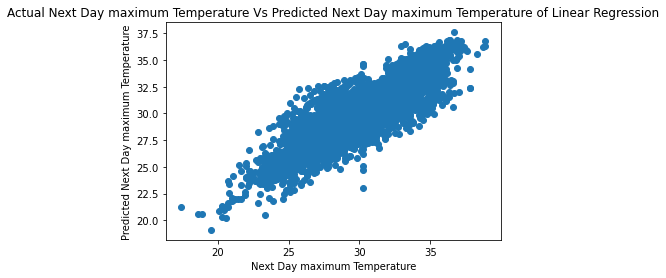

In [300]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,ylrpred)
plt.xlabel('Next Day maximum Temperature')
plt.ylabel('Predicted Next Day maximum Temperature')
plt.title('Actual Next Day maximum Temperature Vs Predicted Next Day maximum Temperature of Linear Regression')
plt.show()

In [301]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

In [302]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)

R Square Score of Linear Regression: 0.7619996024598154


In [303]:
print ('mean absolute error of Linear Regression: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of Linear Regression:  1.1472571846372241


In [304]:
print ('mean squared error of Linear Regression: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of Linear Regression:  2.3288726718690844


In [305]:
print ('Root mean squared error of Linear Regression: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of Linear Regression:  1.5260644389635336


# 4. XGBRegressor MODEL:

In [306]:
#Model Training
xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [307]:
#Prediction with trained data:
yxgpred = xg.predict(x_train)

In [308]:
print("R Square Score of svr:", metrics.r2_score(y_train,yxgpred))

R Square Score of svr: 0.9897711844556627


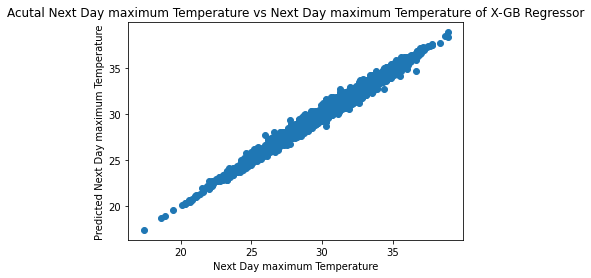

In [309]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yxgpred)
plt.xlabel('Next Day maximum Temperature')
plt.ylabel('Predicted Next Day maximum Temperature')
plt.title('Acutal Next Day maximum Temperature vs Next Day maximum Temperature of X-GB Regressor')
plt.show()

In [310]:
# Predicting test data with model:
y_test_xg_pred = xg.predict(x_test)

In [311]:
xg_accuracy = metrics.r2_score(y_test,y_test_xg_pred)
print("R Square Score of  X-GB Regressor:",xg_accuracy)


R Square Score of  X-GB Regressor: 0.924096250726993


In [312]:
print ('mean absolute error of X-GB Regressor is: ',mean_absolute_error(y_test,y_test_xg_pred))

mean absolute error of X-GB Regressor is:  0.6503496354926578


In [313]:
print ('mean squared error of X-GB Regressor is: ',mean_squared_error(y_test,y_test_xg_pred))

mean squared error of X-GB Regressor is:  0.7427305550801133


In [314]:
print ('Root mean squared error of X-GB Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_xg_pred)))

Root mean squared error of X-GB Regressor is:  0.8618181682235025


# 5.RANDOM FORREST REGRESSOR:

In [315]:
#Model Training:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [316]:
#Model Prediction with trained data:
y_rfr_pred = rfr.predict(x_train)

In [317]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rfr_pred))

R Square Score of Random Forest Regressor: 0.986092111772754


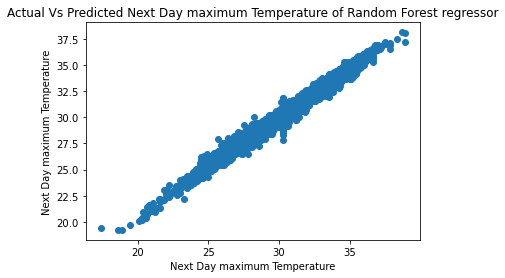

In [318]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rfr_pred)
plt.xlabel('Next Day maximum Temperature')
plt.ylabel('Next Day maximum Temperature')
plt.title('Actual Vs Predicted Next Day maximum Temperature of Random Forest regressor')
plt.show()

In [319]:
# Predicting test data with model:
y_test_rfr_pred = rfr.predict(x_test)

In [320]:
rfr_accuracy = metrics.r2_score(y_test,y_test_rfr_pred)
print("R Square Score of Random Forest Regressor:",rfr_accuracy)

R Square Score of Random Forest Regressor: 0.9061445609611619


In [321]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rfr_pred))

mean absolute error of Random Forest Regressor:  0.7021931541207862


In [322]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rfr_pred))

mean squared error of Random Forest Regressor is:  0.9183907646495408


In [323]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rfr_pred)))

Root mean squared error of Random Forest Regressor is:  0.9583270655937569


# REGULARIZATION:

In [324]:
#Regularization with Lasso
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [325]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

5.9181018454093384e-05

In [326]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=5.9181018454093384e-05)

In [327]:
lasso_reg.score(x_test,y_test)

0.7619997727314963

In [328]:
# Regularization with Ridge
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [329]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.001

In [330]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [331]:
ridge_model.score(x_test,y_test)

0.7619995947092708

# CROSS VALIDATION SCORE:

In [332]:
#Cv of KNN Regression
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean())

[0.87991052 0.86292113 0.87114066 0.8751823  0.86934725]
mean : 0.871700372627059


In [334]:
#CV of Adaboost Regressor
abr_cv_score = cross_val_score(abr,x_train,y_train,cv=5,scoring='r2')
print(abr_cv_score)
print('mean :',abr_cv_score.mean())

[0.75352658 0.75983016 0.74308537 0.7366181  0.7508742 ]
mean : 0.7487868817074559


In [335]:

#CV of Linear Regression
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean())

[0.76158774 0.76889663 0.7596351  0.74987702 0.74775412]
mean : 0.757550121525396


In [336]:
#CV of XGB Regressor
xg_cv_score = cross_val_score(xg,x_train,y_train,cv=5,scoring='r2')
print(xg_cv_score)
print('mean :',xg_cv_score.mean())

[0.91258744 0.91840653 0.90534652 0.91455456 0.90680385]
mean : 0.9115397810166336


In [337]:
#CV of Random forrest regressor
rfr_cv_score = cross_val_score(rfr,x_train,y_train,cv=5,scoring='r2')
print(rfr_cv_score)
print('mean :',rfr_cv_score.mean())

[0.89797996 0.89693918 0.88525304 0.88969472 0.88923217]
mean : 0.8918198139589981


- Choosing Random forrest asthe best model becase we got least difference in Accuracy score and cross validation score which is 90.6-89.6=1 .

# HYPER PARAMETER TUNING OF THE RANDOM FORREST MODEL:

In [401]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [402]:
# Create the random grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [403]:
random_search=RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,cv=5,n_jobs=-1)

In [404]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(bootstrap=False,
                                                   max_depth=80,
                                                   max_features='sqrt',
                                                   min_samples_split=10,
                                                   n_estimators=2000),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 16

In [405]:
best_parameters=random_search.best_params_
print(best_parameters)

{'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [406]:
rfr = RandomForestRegressor(n_estimators= 1600, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 50, bootstrap= True)
rfr.fit(x_train,y_train)
rfr.score(x_test,y_test)

0.9017097505966187

-After hyper Parameter tuning we got the accuracy score of 90.17%.

In [407]:
prediction = rfr.predict(x_test)

In [408]:
result = pd.DataFrame({'Prediction(Next_Tmin)':prediction[:,-1],
                     'Next_Tmin':y_test.iloc[:,-1],
                     'Prediction(Next_Tmax)':prediction[:,-2],
                     'Next_Tmax':y_test.iloc[:,-2]})

In [409]:
result

Prediction(Next_Tmin)  Next_Tmin  Prediction(Next_Tmax)  Next_Tmax
560               24.490830       24.7              27.360187       27.3
2923              21.926694       22.1              30.661031       30.7
6281              22.720653       23.6              30.789567       30.9
304               22.492627       22.4              25.812527       26.0
3835              25.406159       25.7              33.077181       34.4
...                     ...        ...                    ...        ...
7010              25.206111       25.9              33.290889       33.0
7024              26.533850       27.1              34.026774       34.3
5122              22.045123       22.2              32.479445       33.9
4158              22.528804       22.3              32.689608       32.6
1844              21.828524       22.6              28.609619       29.5

[2326 rows x 4 columns]

In [410]:
import joblib
joblib.dump(tuned_model, 'Temperature2.pkl')

['Temperature2.pkl']

In [411]:
save = joblib.load('Temperature2.pkl')
prediction = save.predict(x_test)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, prediction)))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, prediction)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))

Mean Absolute Error: 1.0382872885227523
Mean Squared Error: 1.8919999250817485
Root Mean Squared Error: 1.3754998818908524


In [412]:
prediction

array([[28.07133235, 24.58614755],
       [29.48500931, 22.25057047],
       [30.35202006, 22.21056369],
       ...,
       [31.73591454, 22.06769675],
       [32.33603187, 22.47312433],
       [27.33514832, 21.71666583]])

# CONCLUSION:
- Temperature of a day plays a major role in our daily life, and without the meteorologist and forecaster we would have difficulty planning our daily activities. As we can see, the weather is not a simple subject like we may have been thinking. The study of weather phenomenon requires the use of science, math, and different types of equipment and technology and data. Even with all these  equipment, data, and observation tools, the weather continues to be a topic to study because it is constantly changing. Meteorologist and forecasters predict the weather and its possible changes, but in reality, weather is still unpredictable.so we tried to predict the next day max and min temperature to get firm knowledge about the next day weather.
- In this project, I employ several supervised algorithms to accurately predict the next max and min temperature using data of LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017.We implement various testing procedures to predict the temperatures from preliminary results and further optimize this algorithm to best model the data.The primary goal of this implementation is to construct a model that accurately predicts the next day max and min temperature of the place.
- We set up a process with many steps in order to achieve good accuracy and efficient results.We explored and understood the dataset by exploratory data analysis with the help of histograms, graphs of features against class and more. This helped us understand how the dataset was distributed and if there was any bias in the dataset that we would have to handle before training models.Further, With the help of various preprocessing techniques, such as Handling missing, Outlier detection etc we attempted our best to clean and transform data to improve data efficiency. After cleaning and preprocessing the data, we trained various models on the dataset. We trained 5 models i.e,, Linear Regression, Knn Regressor, Random Forest regressor, AdaBoost Regressor and XGB Regressor. Most of the models gave an accuracy of around 85%. Although Random Forrest Regressor gave us the highest accuracy of 90%.